# STEP:2 CONVOLUTIONAL NEURAL NETWORK (CNN)

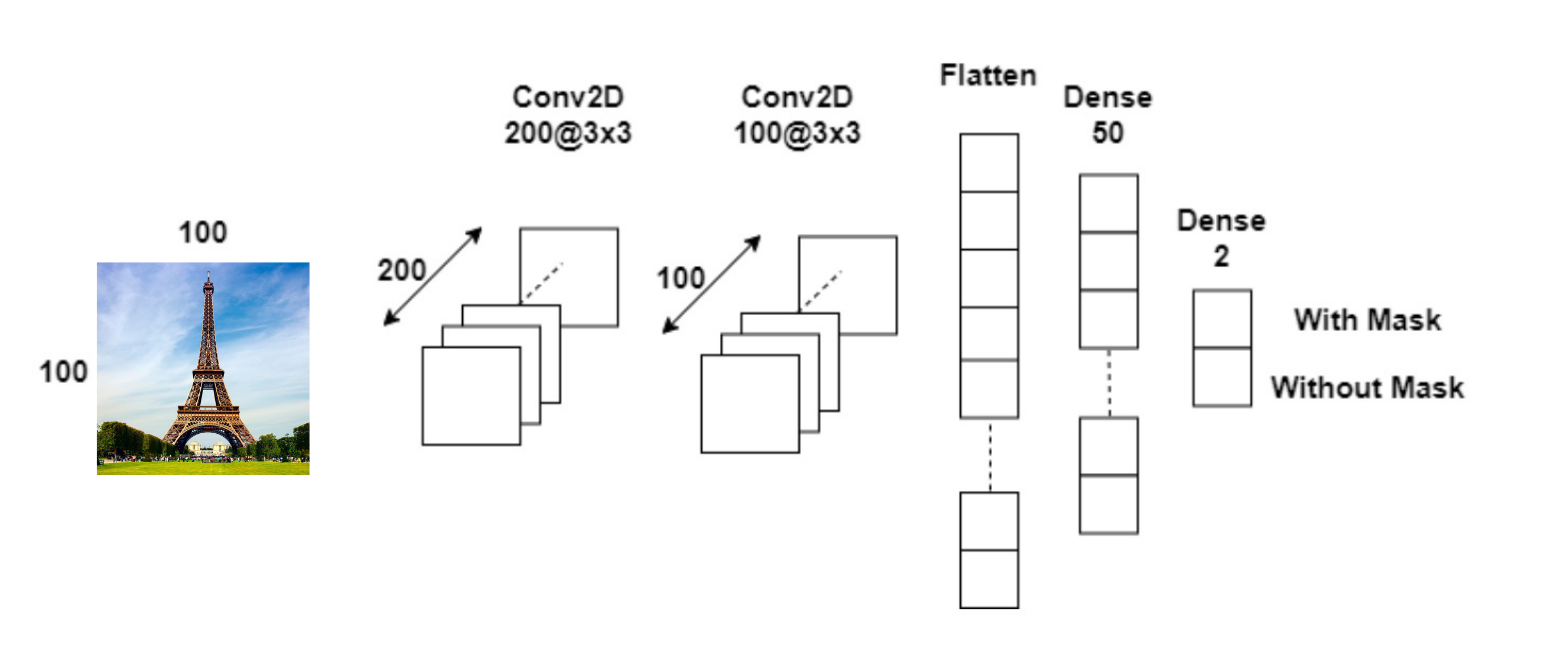

In [1]:
from IPython import display
display.Image('C:/users/Lenovo/Desktop/image2.png')

In [2]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays from the previous code

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 27s 841ms/step - loss: 0.7028 - accuracy: 0.5700 - val_loss: 0.6878 - val_accuracy: 0.5360
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
32/32 [==============================] - 27s 863ms/step - loss: 0.5111 - accuracy: 0.7310 - val_loss: 0.5486 - val_accuracy: 0.7080
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
32/32 [==============================] - 28s 877ms/step - loss: 0.3732 - accuracy: 0.8370 - val_loss: 0.3336 - val_accuracy: 0.8600
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
32/32 [==============================] - 28s 879ms/step - loss: 0.2638 - accuracy: 0.8950 - val_loss: 0.2963 - val_accuracy: 0.8800
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
32/32 [==============================] - 28s 875ms/step - loss: 0.1705 - accuracy: 0.9450 - val_loss: 0.3132 - val_accuracy: 0.8800
Epoch 6/20
32/32 [==============================] - 2

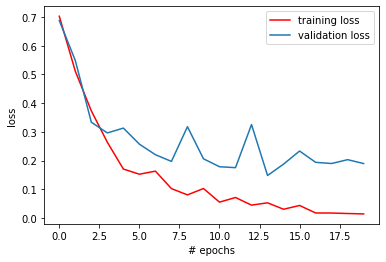

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

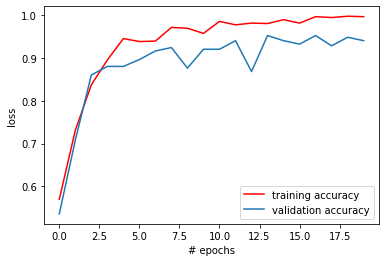

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 214ms/step - loss: 0.2770 - accuracy: 0.9065
[0.2769700586795807, 0.9064748287200928]
